## Analyze the dataset to determine if marketing campaign for Uber was succesful or not for LAX ( Los angeles)

### Chetan Kulkarni

Import Libraries

In [309]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
sns.set_style('whitegrid')
plt.style.use('seaborn-whitegrid')
from scipy import stats
import math

Read Data

In [202]:
data = pd.read_csv("/Users/chetankulkarni/Documents/Python/ALY6015 - Homework 2 - Hypothesis Testing - LAX.csv")

### Exploratory Data Analysis

Check the shape and first few rows of the data

In [339]:
print(data.shape)
data.head()

(109, 3)


,Date,avg,marketing
0,09/14/2018,218.031276,0
1,09/15/2018,134.385218,0
2,09/16/2018,155.298662,0
3,09/17/2018,143.823342,0
4,09/18/2018,154.379123,0


Split the date into date, month and year

In [211]:
data_new = data["Date"].str.rsplit("/", expand = True)
data_new.columns=['month','date','year']
data.columns = ["Date",'avg','marketing']

Use join to merge the two dataframes

In [335]:
df = data.join(data_new)
df.head()

,Date,avg,marketing,month,date,year
0,09/14/2018,218.031276,0,09,14,2018
1,09/15/2018,134.385218,0,09,15,2018
2,09/16/2018,155.298662,0,09,16,2018
3,09/17/2018,143.823342,0,09,17,2018
4,09/18/2018,154.379123,0,09,18,2018


Describe the data to find the mean, standard deviation and any unusual behaviour

In [249]:
df.describe()

,avg,marketing
count,109.000000,109.000000
mean,129.044360,0.348624
std,75.330564,0.478736
min,-22.603465,0.000000
25%,68.756493,0.000000
50%,132.445731,0.000000
75%,167.615398,1.000000
max,332.276401,1.000000


#### As shown above we can say that minimum value for avergage miles driven per hour is shown in negative. We have to impute the negative values.

In [216]:
df.columns

Index(['Date', 'avg', 'marketing', 'month', 'date', 'year'], dtype='object')

Rearrange the columns for convinience

In [220]:
df=df[["Date","month","date","year",'avg','marketing']]

Avg. Daily Miles Driven Per Hour cannot be a nagative value. Hence, we can delete this value

Let's check how many values are in negative

### Data Cleaning and processing

In [246]:
df_clean = df.copy()

Impute the negative data with median, we use median instead of mean as it is not sensitive to outliers

In [338]:
df_median = df_clean[df_clean.avg>0].avg.median()
df_clean.ix[df_clean['avg']< 0,'avg'] = df_median

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


## Data Visualization

Let's plot a violin plot to describe the data between month and marketing 

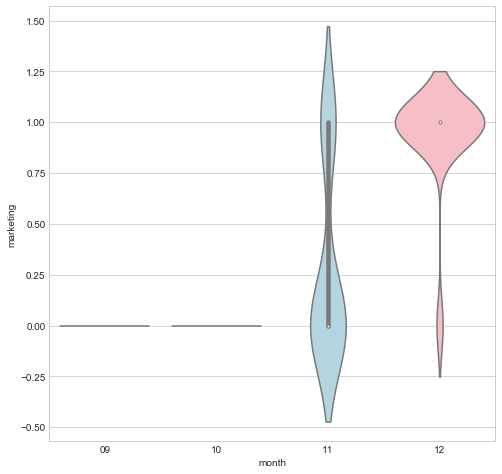

In [330]:
rcParams['figure.figsize'] = 8, 8
sns.violinplot("month", "marketing", data=df_clean,
               palette=["lightblue", "lightpink"]);

#### Observation : No marketing was performed in September and october, marketing was performed only during the month of November and December and from the plot we can observe that marketing was performed a lot during the second half of december.

Let's plot a violin plot to describe the data between marketing vs average

Marketing vs Average plot shows that average was more during the marketing as compared to duration during no marketing.

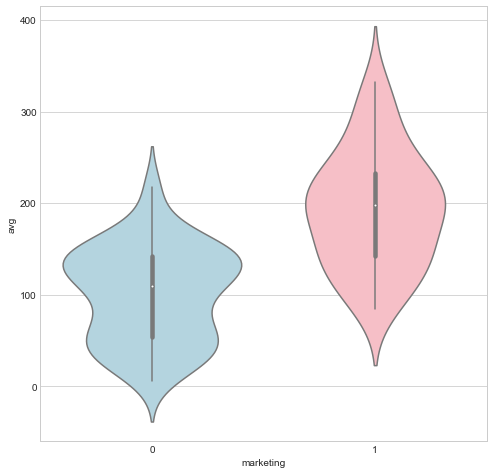

In [329]:
rcParams['figure.figsize'] = 8, 8
sns.violinplot("marketing", "avg", data=df_clean,
               palette=["lightblue", "lightpink"]);

Let's now split the data into marketing and no marketing as below

In [292]:
Overall_No_Marketing = df_clean[df_clean['marketing']==0]
Overall_Marketing = df_clean[df_clean['marketing']==1]

Let's plot a distance plot for Marketing vs No marketing
The distribution says the average is more when marketing campaign was performed. 

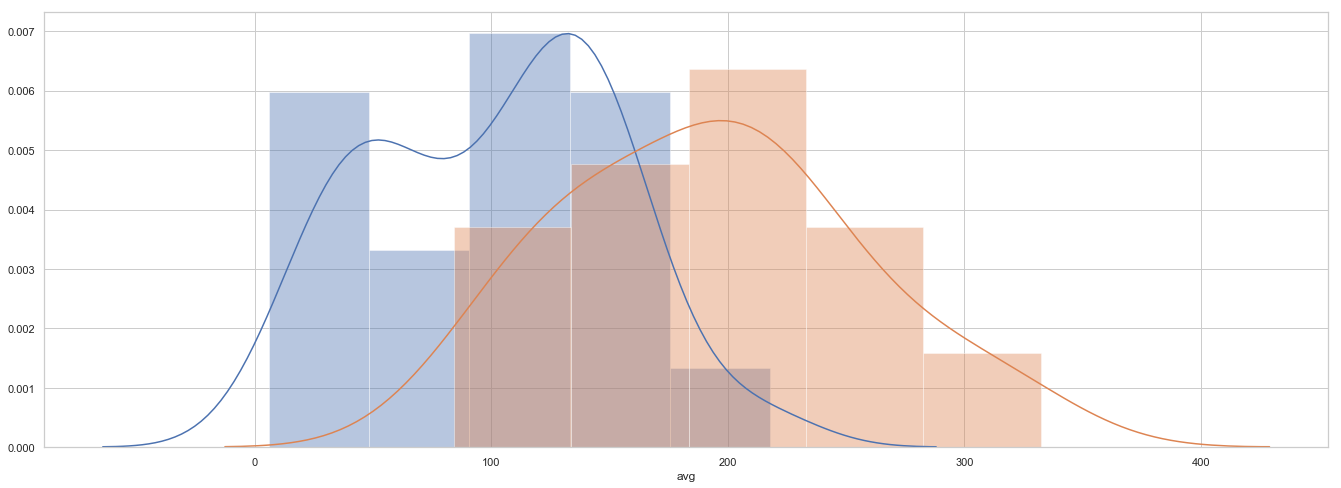

In [340]:
sns.set_style('whitegrid')
plt.figure(figsize=(23,8))
sns.set(style='whitegrid')
ax = sns.distplot(Overall_No_Marketing['avg'], hist=True)
ax = sns.distplot(Overall_Marketing['avg'], hist=True)

### Hypothesis Testing

- Your sample size is greater than 30. Otherwise, use a t test.

- Data points should be independent from each other. In other words, one data point isn’t related or doesn’t affect another data point.

- Your data should be normally distributed. However, for large sample sizes (over 30) this doesn’t always matter.

- Your data should be randomly selected from a population, where each item has an equal chance of being selected.

- Sample sizes should be equal if at all possible.

### Null Hypothesis = Average for No Marketing <= Average for Marketing

### Alternate Hypothesis = Average for Marketing > Average for No Marketing

Let's manually calculate the Z-test, we perform the Z test manually using the below formula
z = (x – μ) / (σ / √n)

In [358]:
x = np.mean(Overall_No_Marketing['avg'])
σ = np.std(Overall_No_Marketing['avg'])
μ = np.mean(Overall_Marketing['avg'])
n = Overall_Marketing['avg'].shape[0]

print(x,"\n",σ,"\n",μ,"\n",n)

101.25084250118312 
 51.371476296098876 
 193.09680487736838 
 38


In [354]:
print((101.25-193.09)/(51.37/math.sqrt(38)))

-11.020825034702566


Let's check using inbuilt stests.ztest

In [359]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests

ztest ,pval = stests.ztest(Overall_Marketing['avg'], x2=None, value=101.25)

print("P-value is",float(pval))

if pval<0.05:
    print("We can reject the null hypothesis")
else:
    print("We can accept the null hypothesis")

P-value is 2.7481492496829105e-19
We can reject the null hypothesis


## Conclusion

We can reject the Null hypothesis as the Z statistic -11.02 is less than the Z score of 1.96 for 95% confidence.

Also P-value is 2.748e-19 which is less than 0.05, Hence Null hypothesis can be rejected.

Hence, marketing campaign for Uber was succesful in increasing the average miles driven per uber driver for LAX region